In [368]:

import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import math
from yellowbrick.model_selection import LearningCurve

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import random_projection
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, FastICA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from scipy.stats import kurtosis
import numpy as np
import mlrose_hiive 
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, mean_squared_error
import itertools
import pandas as pd
import dataframe_image as dfi
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.mixture import GaussianMixture
import time
import seaborn as sns
from scipy.stats import kurtosis
from sklearn import random_projection
from sklearn.manifold import TSNE

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [218]:
#Import league_games.csv into a dataframe
league_games = pd.read_csv(r'C:\\Users\\Jampy\\Machine Learning\\league_games.csv',delimiter=';')

# isolate columns that are needed gamelength, t1_ban1


league_games_y = league_games[['t1_result']]
league_games_y.head(40)

#league_games print column names
#print every column name without the ...
#make a list of ['t1p1_kills',...'t2p5_kills']
column_list = ['t1_firstblood', 't1_firstdragon', 't1_dragons','t2_firstblood', 't2_firstdragon', 't2_dragons']
for i in range(1,6):
    for j in range(1,3):
        column_list.append('t'+str(j)+'p'+str(i)+'_kills')
        column_list.append('t'+str(j)+'p'+str(i)+'_deaths')
        column_list.append('t'+str(j)+'p'+str(i)+'_assists')
league_games_X = league_games[column_list]

#replace Nan with row mean
league_games_X = league_games_X.fillna(league_games_x.mean())

#ravel the y
league_games_y = league_games_y.values.ravel()

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(league_games_X, league_games_y, test_size=0.2, random_state=42)



In [219]:
#Import penguins_size.csv into a dataframe
penguins_size = pd.read_csv(r'C:\\Users\\Jampy\\Machine Learning\\penguins_size.csv')
penguins_y = penguins_size['species']
#convert species to a numeric value
penguins_y = penguins_y.replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})


penguins_X = penguins_size.drop(['species'], axis=1)

#encode the island using one hot encoding, and encode using numeric values
penguins_X = pd.get_dummies(penguins_X, columns=['island','sex'])
#convert True/False values to 1/0
penguins_X = penguins_X.replace({True: 1, False: 0})

#replace the NaN values with the mean of the column
penguins_X = penguins_X.fillna(penguins_X.mean())



penguins_X_train,penguins_X_test, penguins_y_train, penguins_y_test = train_test_split(penguins_X, penguins_y, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)






In [162]:
# Load stars.csv into a dataframe
stars = pd.read_csv(r'C:\Users\Jampy\Machine Learning\A3\stars.csv')
stars_y = stars['Star type']
stars_X = stars.drop(['Star type'], axis=1)

#encode the color using one hot encoding, and encode using numeric values
stars_X['Star color'] = stars_X['Star color'].str.strip().str.lower() #remove whitespace and convert to lowercase
stars_X['Spectral Class'] = stars_X['Spectral Class'].str.strip().str.lower() #remove whitespace and convert to lowercase
stars_X = pd.get_dummies(stars_X, columns=['Star color', 'Spectral Class'])
#convert True/False values to 1/0
stars_X = stars_X.replace({True: 1, False: 0})

#print the unique values of the star color

stars_X

stars_y



0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

Penguins K-Means Clustering
optimal_num_clusters 4
adjusted_rand_score:  0.267
run time:  0.028 seconds

Stars K-Means Clustering
optimal_num_clusters 4
adjusted_rand_score:  0.45
run time:  0.064 seconds

Stars GMM
optimal_num_clusters 4
adjusted_rand_score:  0.267
run time:  0.027 seconds

Penguins EM
optimal_num_clusters 4
adjusted_rand_score:  0.267
run time:  0.03 seconds



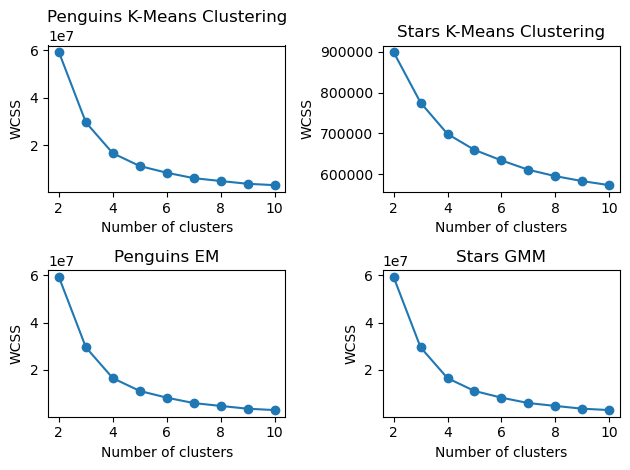

In [349]:
#Part 1
#K-Means Clustering 

fig, ax = plt.subplots(2,2)

#######################################penguins and kmeans
axis_num = [0,0]
optimal_num_clusters = 4 
graph_title = "Penguins K-Means Clustering"
data = penguins_X
labels = penguins_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')




print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################Stars and k-means
axis_num = [0,1]
optimal_num_clusters = 4 
graph_title = "Stars K-Means Clustering"
data = league_games_X
labels = league_games_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')


print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))

start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################Stars and GMM

axis_num = [1,1]
optimal_num_clusters = 4 
graph_title = "Stars GMM"
data = penguins_X
labels = penguins_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


axis_num = [1,0]
optimal_num_clusters = 4 
graph_title = "Penguins EM"
data = penguins_X
labels = penguins_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")



#######################################make entire figure visible
plt.tight_layout()
fig.show()






Penguins PCA Eigenvalues
fit time:  0.001 seconds
baseline fit time:  0.101 seconds
pca fit time:  0.098 seconds
baseline_accuracy:  0.993
pca_accuracy:  0.945

League of Legends PCA Eigenvalues
fit time:  0.01 seconds
baseline fit time:  0.18 seconds
pca fit time:  0.137 seconds
baseline_accuracy:  0.954
pca_accuracy:  0.951



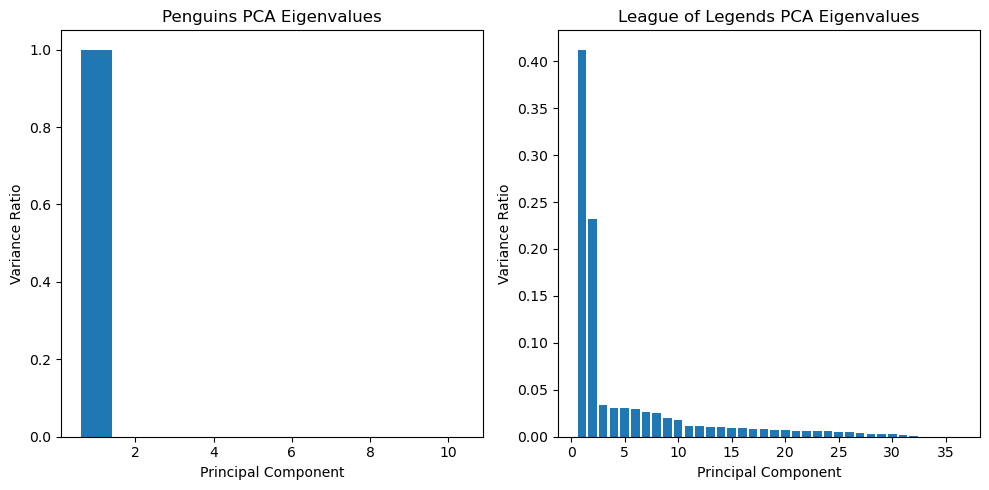

In [297]:
#Part 2 PCA

fig, ax = plt.subplots(1,2,figsize=(10,5))

####################################### #PCA penguins
axis_num = 0
graph_title = "PCA Penguins Eigenvalues"
data = penguins_X
labels = penguins_y
optimal_n_components = 3
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

graph_title = "Penguins PCA Eigenvalues"

#Graph the eigenvalues for each component
pca = PCA()
pca.fit(data)
eigenvalues = pca.explained_variance_ / np.sum(pca.explained_variance_)


ax[axis_num ].bar(range(1, len(eigenvalues) + 1), eigenvalues)
ax[axis_num ].set_xlabel('Principal Component')
ax[axis_num ].set_ylabel('Variance Ratio')
ax[axis_num ].set_title(graph_title)

#PCA fit_predict
print(graph_title)
start = time.time()
PCA(n_components=optimal_num_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the PCA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
pca = PCA(n_components=optimal_n_components)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_pca = RandomForestClassifier(random_state=42)
start = time.time()
model_with_pca.fit(X_train_pca, y_train)
end = time.time()
print("pca fit time: ", round(end - start,3), "seconds")
y_pred_pca = model_with_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("pca_accuracy: ", round(pca_accuracy,3))
print("")

#apply kmeans to the pca data
kmeans = KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(X_train_pca)

####################################### #PCA League of Legends

axis_num = 1
graph_title = "PCA Penguins Eigenvalues"
data = league_games_X
labels = league_games_y
optimal_n_components = 2
graph_title = "League of Legends PCA Eigenvalues"
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

#Graph the eigenvalues for each component
pca = PCA()
pca.fit(data)
eigenvalues = pca.explained_variance_ / np.sum(pca.explained_variance_)


ax[axis_num ].bar(range(1, len(eigenvalues) + 1), eigenvalues)
ax[axis_num ].set_xlabel('Principal Component')
ax[axis_num ].set_ylabel('Variance Ratio')
ax[axis_num ].set_title(graph_title)

#PCA fit_predict
print(graph_title)
start = time.time()
PCA(n_components=optimal_num_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the PCA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
pca = PCA(n_components=optimal_n_components)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_pca = RandomForestClassifier(random_state=42)
start = time.time()
model_with_pca.fit(X_train_pca, y_train)
end = time.time()
print("pca fit time: ", round(end - start,3), "seconds")
y_pred_pca = model_with_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("pca_accuracy: ", round(pca_accuracy,3))
print("")





####################################### Make entire figure visible
plt.tight_layout()
fig.show()

ICA Penguins
fit time:  0.042 seconds
baseline fit time:  0.102 seconds
ica fit time:  0.1 seconds
baseline_accuracy:  0.993
ICP_accuracy:  0.975

ICA League of Legends
fit time:  0.027 seconds
baseline fit time:  0.176 seconds
ica fit time:  0.184 seconds
baseline_accuracy:  0.954
ICP_accuracy:  0.953



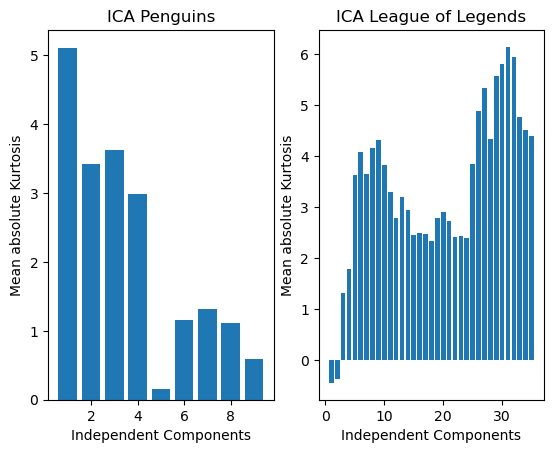

In [298]:
#Part 2 ICA
from scipy.stats import kurtosis


def calculate_Kurtosis_ica(n_components, data):
    kurts = np.array([])
    ica = FastICA(n_components=n_components, max_iter=500)
    #calculate the kurtosis for each component
    ica.fit(data)
    for i in range(1, len(ica.components_) + 1):
        #add the kurtosis of each component to the array
        kurts = np.append(kurts, kurtosis(ica.components_[i-1]))
    return kurts.mean()

fig, ax = plt.subplots(1,2)

####################################### ICA penguins
axis_num = 0
graph_title = "ICA Penguins"
data = penguins_X
labels = penguins_y
optimal_n_components = 8
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

#graph the kurtosis for each component
ica = FastICA()
ica.fit(data)
kurts = []
for i in range(1, len(ica.components_) ):
    kurts.append(calculate_Kurtosis_ica(i,data))

ax[axis_num ].bar(range(1, len(kurts) + 1), kurts)
ax[axis_num ].set_xlabel('Independent Components')
ax[axis_num ].set_ylabel('Mean absolute Kurtosis')
ax[axis_num ].set_title(graph_title)

print(graph_title)
start = time.time()
FastICA(n_components=optimal_n_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the ICA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
ica = FastICA(n_components=optimal_n_components) 
X_train_ica = ica.fit_transform(X_train)
X_test_ica= ica.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_ica = RandomForestClassifier(random_state=42)
start = time.time()
model_with_ica.fit(X_train_ica, y_train)
end = time.time()
print("ica fit time: ", round(end - start,3), "seconds")
y_pred_ica = model_with_ica.predict(X_test_ica)
ica_accuracy = accuracy_score(y_test, y_pred_ica)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("ICP_accuracy: ", round(ica_accuracy,3))
print("")



####################################### ICA League of Legends


axis_num = 1
graph_title = "ICA League of Legends"
data = league_games_X
labels = league_games_y
optimal_n_components = 8
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

#graph the kurtosis for each component
ica = FastICA()
ica.fit(data)
kurts = []
for i in range(1, len(ica.components_) ):
    kurts.append(calculate_Kurtosis_ica(i,data))

ax[axis_num ].bar(range(1, len(kurts) + 1), kurts)
ax[axis_num ].set_xlabel('Independent Components')
ax[axis_num ].set_ylabel('Mean absolute Kurtosis')
ax[axis_num ].set_title(graph_title)

print(graph_title)
start = time.time()
FastICA(n_components=optimal_n_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the ICA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
ica = FastICA(n_components=optimal_n_components) 
X_train_ica = ica.fit_transform(X_train)
X_test_ica= ica.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_ica = RandomForestClassifier(random_state=42)
start = time.time()
model_with_ica.fit(X_train_ica, y_train)
end = time.time()
print("ica fit time: ", round(end - start,3), "seconds")
y_pred_ica = model_with_ica.predict(X_test_ica)
ica_accuracy = accuracy_score(y_test, y_pred_ica)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("ICP_accuracy: ", round(ica_accuracy,3))
print("")


(344, 10)
baseline fit time:  0.107 seconds
rp fit time:  0.103 seconds
baseline_accuracy:  0.993
rp_accuracy:  0.578



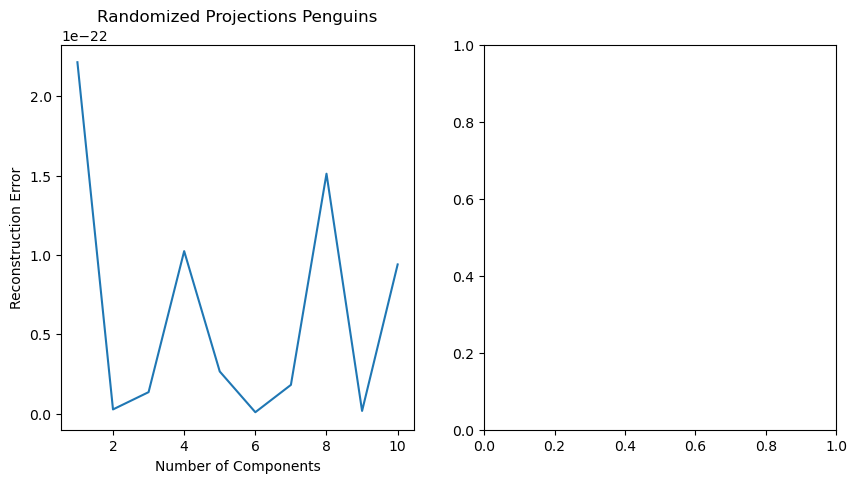

In [323]:
# Part 2 Randomized Projections

fig, ax = plt.subplots(1,2,figsize=(10,5))

####################################### Randomized Projections penguins
axis_num = 0
graph_title = "Randomized Projections Penguins"
data = penguins_X
labels = penguins_y
optimal_n_components = 2
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

print(data.shape)

# Define the number of desired components (dimensionality reduction)

for seed in range(1,20):
    for n_components in range(1,len(data.columns)+1):
        reconstruction_error = []
        rp = random_projection.GaussianRandomProjection(n_components=n_components, random_state=seed)
        rp.fit(data)

        # Apply the random projection to the original data
        X_transformed = rp.transform(data)
        reconstructed_data = np.dot(X_transformed, rp.components_)

        # Calculate the reconstruction error
        reconstruction_error.append(np.mean(np.square(data - reconstructed_data)))





#calculate reconstruction error
reconstruction_error = ((data - rp.inverse_transform(rp.transform(data))) ** 2).mean()
#plot the reconstruction error
ax[axis_num ].plot(range(1, len(reconstruction_error) + 1), reconstruction_error)
ax[axis_num ].set_xlabel('Number of Components')
ax[axis_num ].set_ylabel('Reconstruction Error')
ax[axis_num ].set_title(graph_title)

#evaluate the randomized projections using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply RA
rp = random_projection.GaussianRandomProjection(n_components=optimal_n_components, random_state=42)
X_train_rp = rp.fit_transform(X_train)
X_test_rp = rp.transform(X_test)

# Step 4: Build a model with RP-transformed features
model_with_rp = RandomForestClassifier(random_state=42)
start = time.time()
model_with_rp.fit(X_train_rp, y_train)
end = time.time()
print("rp fit time: ", round(end - start,3), "seconds")
y_pred_rp = model_with_rp.predict(X_test_rp)
rp_accuracy = accuracy_score(y_test, y_pred_rp)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("rp_accuracy: ", round(rp_accuracy,3))
print("")
####################################### Randomized Projections League of Legends


baseline fit time:  0.175 seconds
tsne fit time:  0.162 seconds
baseline_accuracy:  0.954
tsne_accuracy:  0.891



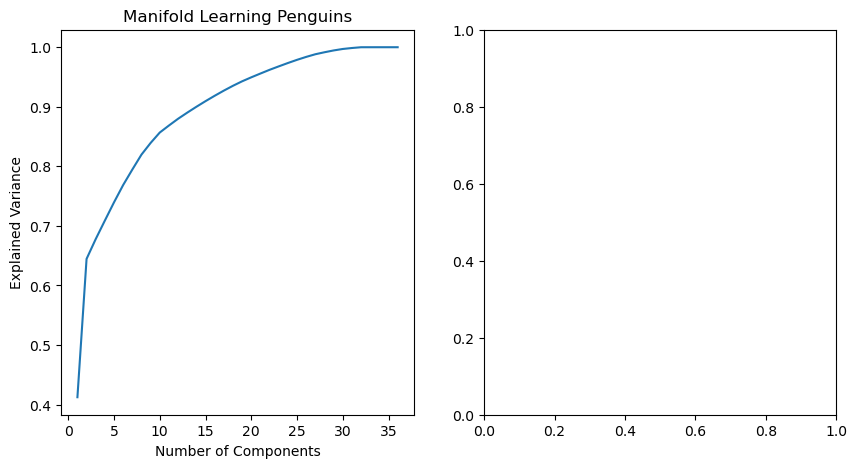

In [334]:
#Part 2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

fig, ax = plt.subplots(1,2,figsize=(10,5))

####################################### t-SNE penguins

axis_num = 0
graph_title = "Manifold Learning Penguins"
data = league_games_X
labels = league_games_y
optimal_n_components = 2
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)


explained_variance = []
for n_components in range(1, data.shape[1] + 1):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    explained_variance.append(pca.explained_variance_ratio_.sum())

#plot the explained variance
ax[axis_num ].plot(range(1, len(explained_variance) + 1), explained_variance)
ax[axis_num ].set_xlabel('Number of Components')
ax[axis_num ].set_ylabel('Explained Variance')
ax[axis_num ].set_title(graph_title)

#evaluate the t-SNE using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=optimal_n_components, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Step 4: Build a model with t-SNE-transformed features
model_with_tsne = RandomForestClassifier(random_state=42)
start = time.time()
model_with_tsne.fit(X_train_tsne, y_train)
end = time.time()
print("tsne fit time: ", round(end - start,3), "seconds")
y_pred_tsne = model_with_tsne.predict(X_test_tsne)
tsne_accuracy = accuracy_score(y_test, y_pred_tsne)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("tsne_accuracy: ", round(tsne_accuracy,3))
print("")




Penguins PCA into K-Means 
optimal_num_clusters 4
adjusted_rand_score:  0.267
run time:  0.025 seconds

League of Legends RP into K-Means
optimal_num_clusters 4
adjusted_rand_score:  0.385
run time:  0.033 seconds

League of Legends RP into GMM
optimal_num_clusters 4
adjusted_rand_score:  0.385
run time:  0.033 seconds

Penguins PCA into GMM
optimal_num_clusters 4
adjusted_rand_score:  0.267
run time:  0.024 seconds



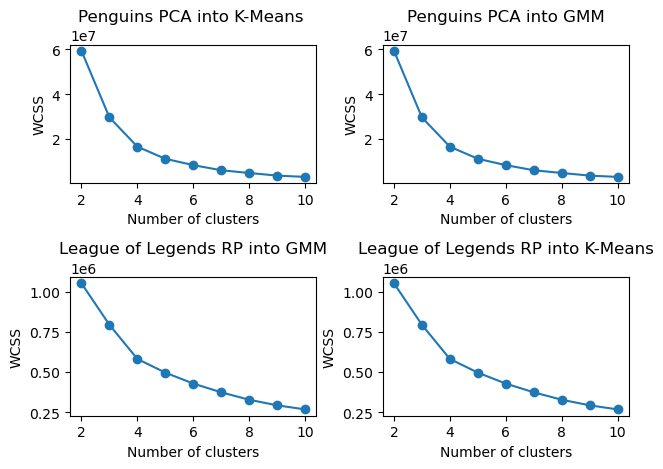

In [342]:
#Part 3 , DR and then clustering , only using 
#Apply PCA, ICA, RP, and t-SNE to the penguins dataset and then apply k-means clustering 
#to the results of each dimensionality reduction technique.

#PCA
#penguins
optimal_n_components = 2
data = penguins_X
labels = penguins_y

# Step 3: Apply PCA
pca = PCA(n_components=optimal_n_components)  # Retain 95% of the variance
data_pca = pca.fit_transform(data)


#Randomized Projections
#league of legends
optimal_n_components = 2
data = league_games_X
labels = league_games_y

# Step 3: Apply RP
rp = random_projection.GaussianRandomProjection(n_components=optimal_n_components, random_state=42)
data_rp = rp.fit_transform(data)




#Apply clusting to the results of each dimensionality reduction technique

fig, ax = plt.subplots(2,2)

#######################################penguins and kmeans
axis_num = [0,0]
optimal_num_clusters = 4 
graph_title = "Penguins PCA into K-Means "
data = data_pca
labels = penguins_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')




print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################Stars and k-means
axis_num = [1,1]
optimal_num_clusters = 4 
graph_title = "League of Legends RP into K-Means"
data = data_rp 
labels = league_games_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')


print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))

start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")

###################################### penguins RP and GMM
axis_num = [1,0]
optimal_num_clusters = 4 
graph_title = "League of Legends RP into GMM"
data = data_rp
labels = league_games_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################Stars and GMM

axis_num = [0,1]
optimal_num_clusters = 4 
graph_title = "Penguins PCA into GMM"
data = data_pca
labels = penguins_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")



#######################################make entire figure visible
plt.tight_layout()
fig.show()





baseline fit time:  2.795 seconds
ica fit time:  20.32 seconds
tsne fit time:  4.144 seconds


Text(0.5, 1.0, 'Penguins Neural Network t-SNE')

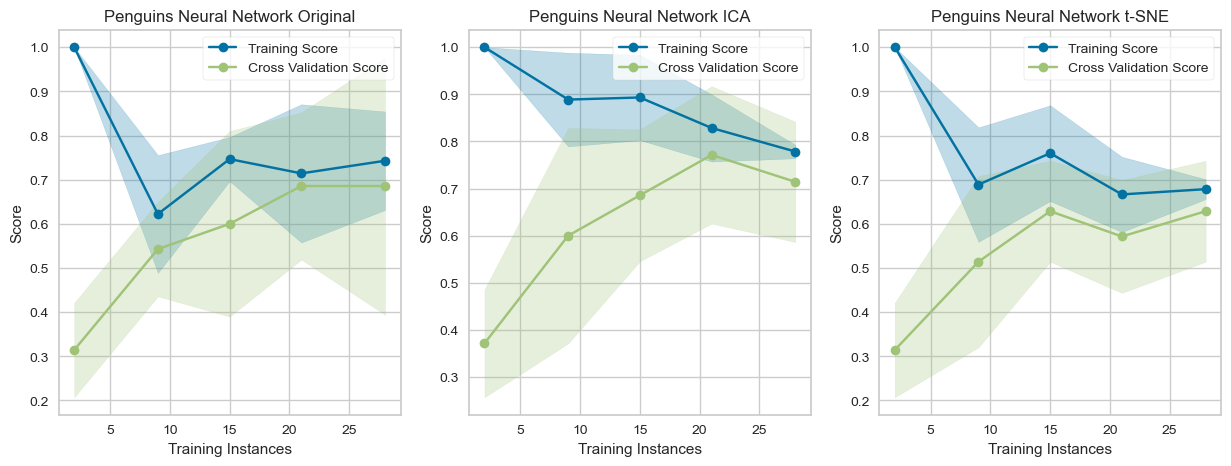

In [392]:
#Part 4, ICA and then Nueral Network
#Penguins Neural Network
#penguins
figure, ax = plt.subplots(1,3,figsize=(15,5))

graph_title = "Penguins Neural Network Original"
axis_num = 0
optimal_n_components = 2
data = penguins_X
labels = penguins_y
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.1, random_state=42)

param_grid = {'hidden_layer_sizes': [(100,100,100), (100,50,100), (50,100,50)], 'activation': ['tanh', 'relu'], 'solver': ['sgd','adam'], 'alpha': [.05,.01,.005,.001]}
grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=10000), param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
learning_curve.finalize()
ax[axis_num].set_title(graph_title)



# Apply ICA
ica = FastICA(n_components=optimal_n_components, random_state=42)
X_train_ica = ica.fit_transform(X_train)

graph_title = "Penguins Neural Network ICA"
axis_num = 1

grid_search.fit(X_train_ica, y_train)
best_model = grid_search.best_estimator_

learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_ica, y_train)
end = time.time()
print("ica fit time: ", round(end - start,3), "seconds")

learning_curve.finalize()
ax[axis_num].set_title(graph_title)


# apply t-SNE
tsne = TSNE(n_components=optimal_n_components, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

graph_title = "Penguins Neural Network t-SNE"
axis_num = 2

grid_search.fit(X_train_tsne, y_train)
best_model = grid_search.best_estimator_

learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_tsne, y_train)
end = time.time()
print("tsne fit time: ", round(end - start,3), "seconds")

learning_curve.finalize()
ax[axis_num].set_title(graph_title)





baseline fit time:  3.378 seconds
gmm fit time:  3.226 seconds


Text(0.5, 1.0, 'Penguins Neural Network GMM as new features')

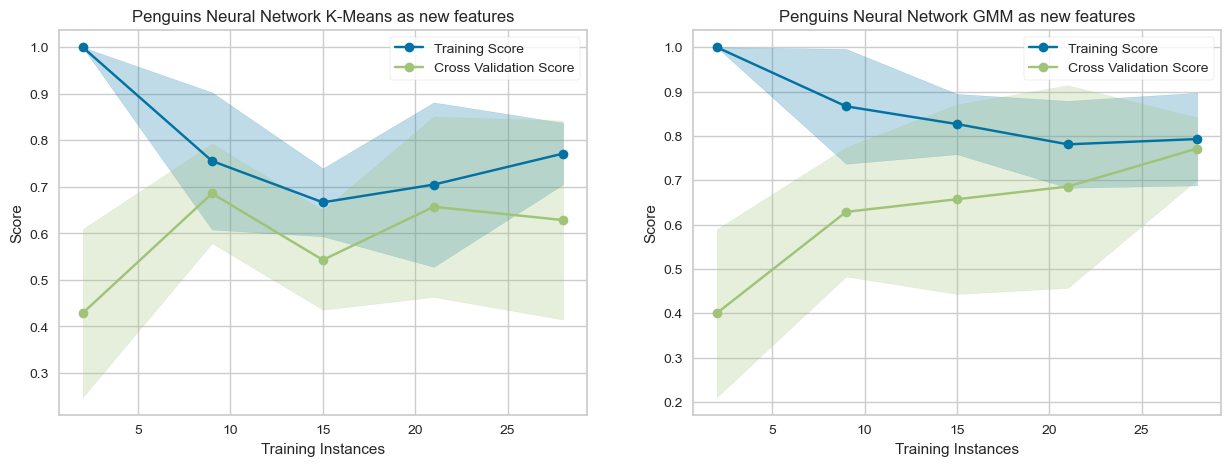

In [394]:
#Part 5 rerun part four with Clustering as new features

fig, ax = plt.subplots(1,2,figsize=(15,5))

#K-Means Clusterts as new features
#penguins

graph_title = "Penguins Neural Network K-Means as new features"
axis_num = 0

optimal_num_clusters = 4
data = penguins_X
labels = penguins_y
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.1, random_state=42)

# apply kmeans
kmeans = KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(X_train)

#add the kmeans clusters to the data
X_train_kmeans = np.column_stack((X_train,kmeans))

param_grid = {'hidden_layer_sizes': [(100,100,100), (100,50,100), (50,100,50)], 'activation': ['tanh', 'relu'], 'solver': ['sgd','adam'], 'alpha': [.05,.01,.005,.001]}
grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=10000), param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train_kmeans, y_train)
best_model = grid_search.best_estimator_


learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_kmeans, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
learning_curve.finalize()
ax[axis_num].set_title(graph_title)


#GMM Clusterts as new features
#penguins

graph_title = "Penguins Neural Network GMM as new features"
axis_num = 1

optimal_num_clusters = 4
data = penguins_X
labels = penguins_y
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.1, random_state=42)

# apply kmeans
gmm = GaussianMixture(n_components=optimal_num_clusters, random_state=0).fit_predict(X_train)

#add the kmeans clusters to the data
X_train_gmm = np.column_stack((X_train,gmm))

grid_search.fit(X_train_gmm, y_train)
best_model = grid_search.best_estimator_

learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_gmm, y_train)
end = time.time()
print("gmm fit time: ", round(end - start,3), "seconds")
learning_curve.finalize()
ax[axis_num].set_title(graph_title)

